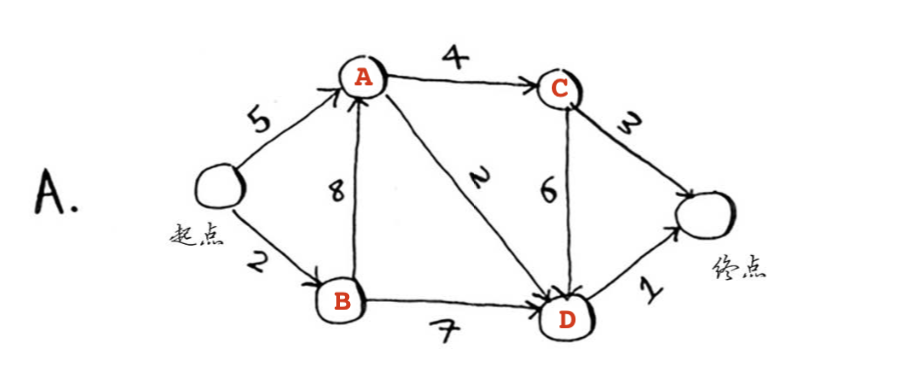

## find the shortest weighted path from start to the end

In [25]:
# create graph: a dict representing the graph
graph = {}
graph['S'] = {'A':5, 'B':2}
graph['A'] = {'C':4, 'D':2}
graph['B'] = {'A':8, 'D':7}
graph['C'] = {'D':6, 'E':3}
graph['D'] = {'E':1}

In [26]:
# create costs: a dict representing the distance from the start to the node
# initialize with nodes which are nearest to the start point('S')
# update if new_cost < cost[node]
costs = {}
costs['A'] = 5
costs['B'] = 2
costs['E'] = float('inf')

In [27]:
# create parents: a dict representing the parent-child relationship
# initialize with nodes which are nearest to the start point
# update with cost
parents = {}
parents['A'] = 'S'
parents['B'] = 'S'

In [28]:
# create processed: a list containing the nodes that have been processed
processed = []

In [29]:
# find the nodes with lowest cost to start
def find_lowest_cost_node(costs, processed):
    # filter out the nodes that have been processed
    costs = {key:value for key, value in costs.items() if key not in processed}
    # find the lowest cost
    keys = [key for key,value in costs.items()]
    values = [value for key, value in costs.items()]
    result = keys[values.index(min(values))]
    return result

In [35]:
# viz path
def find_path(parents, end_point, start_point):
    path = []
    while end_point != start_point:
        path.append(end_point)
        end_point = parents[end_point]
    path.append(start_point)
    path = path[::-1]
    print('->'.join(path))

In [32]:
# initilize with the closest node of 'S'
node = find_lowest_cost_node(costs, processed)

while node != 'E':
    cost = costs[node]
    # find all the neighbours of the current node
    neighbours = graph[node].keys()
    # 
    for neighbour in neighbours:
        new_cost = graph[node][neighbour] + cost
        if new_cost < costs.get(neighbour, float('inf')):
            costs[neighbour] = new_cost
            parents[neighbour] = node
    processed.append(node)
    node = find_lowest_cost_node(costs, processed)    

In [37]:
find_path(parents,'E','S')

S->A->D->E


In [38]:
costs

{'A': 5, 'B': 2, 'E': 8, 'D': 7, 'C': 9}